# Ensemble Learning (Part A)
A. Implement Random Forest Classifier model to predict the safety of the car.
    
Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 1. Load dataset with manual headers
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "decision"]
df = pd.read_csv("car_evaluation.csv", names=columns)

In [3]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
  buying  maint doors persons lug_boot safety decision
0  vhigh  vhigh     2       2    small    low    unacc
1  vhigh  vhigh     2       2    small    med    unacc
2  vhigh  vhigh     2       2    small   high    unacc
3  vhigh  vhigh     2       2      med    low    unacc
4  vhigh  vhigh     2       2      med    med    unacc


In [4]:
# 2. Encode categorical features (all are categorical here)
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [5]:
# 3. Separate features (X) and target (y)
X = df.drop("decision", axis=1)
y = df["decision"]

In [6]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 5. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# 6. Predictions
y_pred = model.predict(X_test)

In [9]:
# 7. Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9739884393063584

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



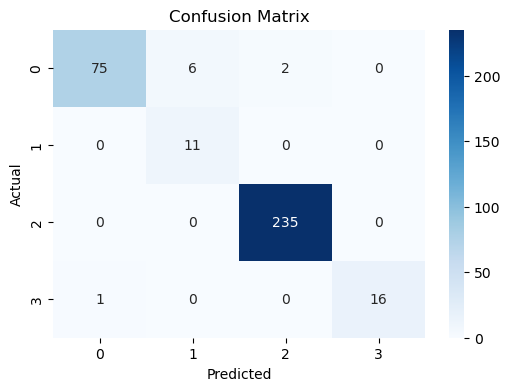

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

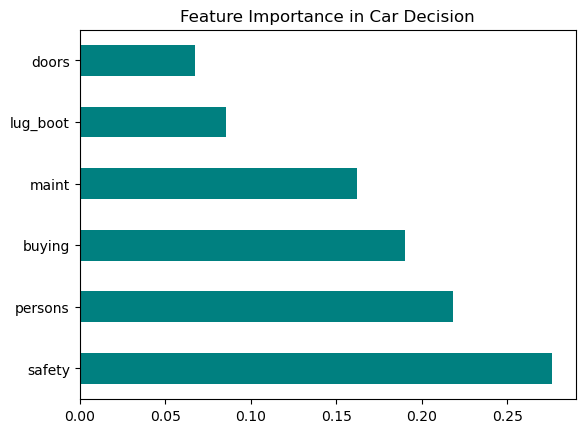

In [11]:
# 8. Feature Importance
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh', color='teal')
plt.title("Feature Importance in Car Decision")
plt.show()

In [12]:
# 1. Load dataset with manual headers
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "decision"]
df = pd.read_csv("car_evaluation.csv", names=columns)

# 2. Encode categorical features with SEPARATE encoders
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # save encoder for later use

# 3. Features and target
X = df.drop("safety", axis=1)   # 🎯 Predict SAFETY
y = df["safety"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
def predict_safety(model, encoders):
    print("\nEnter car attributes for prediction of safety:")
    buying = input("Buying price (vhigh, high, med, low): ")
    maint = input("Maintenance cost (vhigh, high, med, low): ")
    doors = input("Number of doors (2, 3, 4, 5more): ")
    persons = input("Capacity (2, 4, more): ")
    lug_boot = input("Luggage boot size (small, med, big): ")
    decision = input("Decision (unacc, acc, good, vgood): ")

    # Put user input into dataframe
    user_data = pd.DataFrame({
        "buying": [buying],
        "maint": [maint],
        "doors": [doors],
        "persons": [persons],
        "lug_boot": [lug_boot],
        "decision": [decision]
    })

    # Encode user input with the SAME encoders used for training
    for col in user_data.columns:
        user_data[col] = encoders[col].transform(user_data[col])

    # Predict safety
    prediction = model.predict(user_data)[0]
    pred_label = encoders["safety"].inverse_transform([prediction])[0]

    print("\n✅ Predicted Safety Level:", pred_label)

# 7. Call function
predict_safety(model, encoders)


Enter car attributes for prediction of safety:


Buying price (vhigh, high, med, low):  vhigh
Maintenance cost (vhigh, high, med, low):  vhigh
Number of doors (2, 3, 4, 5more):  2
Capacity (2, 4, more):  2
Luggage boot size (small, med, big):  small
Decision (unacc, acc, good, vgood):  unacc



✅ Predicted Safety Level: med
